In [1]:
12

12

In [2]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv


Точность модели: 0.89

Отчёт о классификации:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



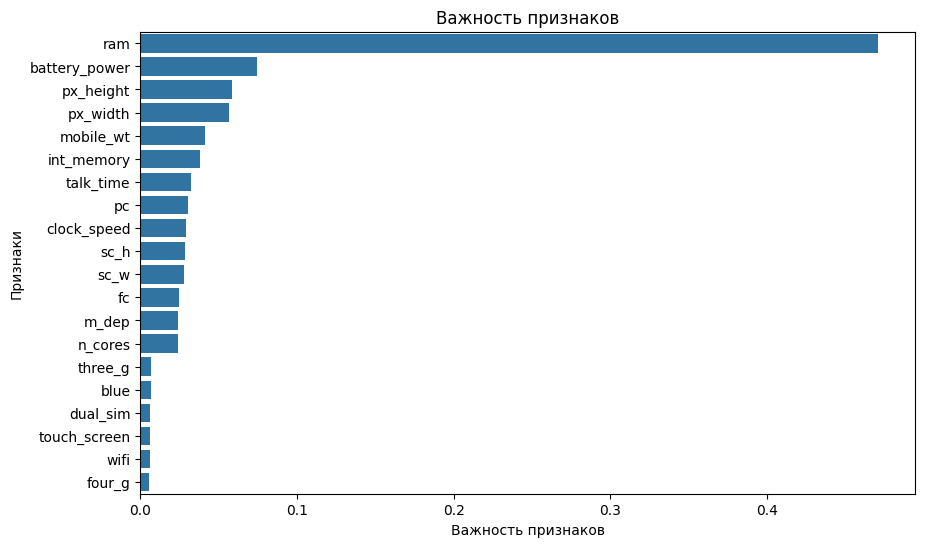

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Загрузка и подготовка данных
# -------------------------------

# Загрузка данных
df = pd.read_csv("train.csv")

# Разделение признаков и целевой переменной
X = df.drop("price_range", axis=1)
y = df["price_range"]

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# -------------------------------
# 2. Обучение модели
# -------------------------------

# Инициализация и обучение модели RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

# Отчёт о классификации
print("\nОтчёт о классификации:")
print(classification_report(y_test, y_pred))

# -------------------------------
# 3. Визуализация важности признаков
# -------------------------------

# Важность признаков
importances = model.feature_importances_
features = X.columns

# Сортировка по важности признаков
indices = importances.argsort()[::-1]
sorted_features = [features[i] for i in indices]
sorted_importances = importances[indices]

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_features)
plt.title("Важность признаков")
plt.xlabel("Важность признаков")
plt.ylabel("Признаки")
plt.show()
